<a href="https://colab.research.google.com/github/sasumwen/medical-cost/blob/main/medical_cost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [22]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [23]:
# one hot encoding the categorical features

insurance_one_hoted = pd.get_dummies(insurance)
insurance_one_hoted

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [24]:
# create features and labels

X = insurance_one_hoted.drop('charges', axis =1)
y = insurance_one_hoted["charges"]

X.head(), y.head()

(   age     bmi  children  sex_female  sex_male  smoker_no  smoker_yes  \
 0   19  27.900         0           1         0          0           1   
 1   18  33.770         1           0         1          1           0   
 2   28  33.000         3           0         1          1           0   
 3   33  22.705         0           0         1          1           0   
 4   32  28.880         0           0         1          1           0   
 
    region_northeast  region_northwest  region_southeast  region_southwest  
 0                 0                 0                 0                 1  
 1                 0                 0                 1                 0  
 2                 0                 0                 1                 0  
 3                 0                 1                 0                 0  
 4                 0                 1                 0                 0  ,
 0    16884.92400
 1     1725.55230
 2     4449.46200
 3    21984.47061
 4     3866.85520
 

In [25]:
# create train and test set
tf.random.set_seed(84)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.2)

len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [26]:
# Building the model
tf.random.set_seed(84)

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(100, activation = "relu"),
    tf.keras.layers.Dense(1)
])

# compile
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer = tf.keras.optimizers.SGD(),
                        metrics = ["mae"]
                        )

# fit
insurance_model.fit(tf.expand_dims(X_train, -1), y_train, epochs = 500)


Epoch 1/500
34/34 [==============================] - 1s 4ms/step - loss: 12612.8223 - mae: 12612.8223
Epoch 2/500
34/34 [==============================] - 0s 3ms/step - loss: 10839.8945 - mae: 10839.8945
Epoch 3/500
34/34 [==============================] - 0s 4ms/step - loss: 8638.1963 - mae: 8638.1963
Epoch 4/500
34/34 [==============================] - 0s 4ms/step - loss: 9074.8398 - mae: 9074.8398
Epoch 5/500
34/34 [==============================] - 0s 4ms/step - loss: 8701.8555 - mae: 8701.8555
Epoch 6/500
34/34 [==============================] - 0s 4ms/step - loss: 8597.0508 - mae: 8597.0508
Epoch 7/500
34/34 [==============================] - 0s 4ms/step - loss: 8484.2988 - mae: 8484.2988
Epoch 8/500
34/34 [==============================] - 0s 3ms/step - loss: 8620.2637 - mae: 8620.2637
Epoch 9/500
34/34 [==============================] - 0s 3ms/step - loss: 8546.4248 - mae: 8546.4248
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 8541.3643 - mae: 8541.

In [27]:
# check the result of the insurance on the test data by evaluating

insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 8200.8340 - mae: 8200.8340


[8200.833984375, 8200.833984375]

Being wrong by over 8000 shows the model isn't performing well., lets try improvement

In [28]:
tf.random.set_seed
callback= tf.keras.callbacks.EarlyStopping(monitor = "mae", patience = 3)

insurance_model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(570),
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(57),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

insurance_model2.compile(loss=tf.keras.losses.mae,
                         optimizer= tf.keras.optimizers.Adam(),
                         metrics =['mae'])



ins = insurance_model2.fit(tf.expand_dims(X_train, -1), y_train, callbacks = [callback], epochs =200)

Epoch 1/200
34/34 [==============================] - 1s 7ms/step - loss: 12913.5723 - mae: 12913.5723
Epoch 2/200
34/34 [==============================] - 0s 7ms/step - loss: 12076.0732 - mae: 12076.0732
Epoch 3/200
34/34 [==============================] - 0s 8ms/step - loss: 11970.5195 - mae: 11970.5195
Epoch 4/200
34/34 [==============================] - 0s 7ms/step - loss: 11822.4258 - mae: 11822.4258
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 11128.4092 - mae: 11128.4092
Epoch 6/200
34/34 [==============================] - 0s 7ms/step - loss: 8762.1406 - mae: 8762.1406
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 8464.1729 - mae: 8464.1729
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 8433.5586 - mae: 8433.5586
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 8403.7451 - mae: 8403.7451
Epoch 10/200
34/34 [==============================] - 0s 8ms/step - loss: 8417.0693 - mae:

In [29]:
insurance_model2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 4ms/step - loss: 8196.1914 - mae: 8196.1914


[8196.19140625, 8196.19140625]

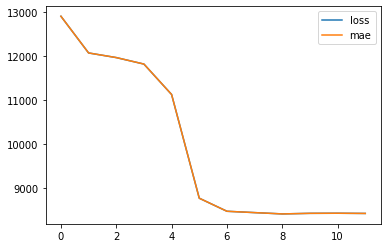

In [30]:

pd.DataFrame(ins.history).plot()

In [31]:
insurance


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


### Scaling and Normalization

In [32]:
import sklearn

In [33]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

# create features and labels
X = insurance.drop('charges', axis =1)
y = insurance["charges"]

# create test and train set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=84)

# fit the column transformer to training data
ct.fit(X_train)

# tranform the train and test with normalization
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [34]:
X_train_normal[0]

array([0.5      , 0.5759148, 0.4      , 0.       , 1.       , 1.       ,
       0.       , 0.       , 1.       , 0.       , 0.       ])

Build a neural network model to fit the normalized data

In [35]:
tf.random.set_seed(84)

callback= tf.keras.callbacks.EarlyStopping(monitor = "mae", patience = 3)

insurance_model3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

insurance_model3.compile(loss = tf.keras.losses.mae,
                         optimizer = tf.keras.optimizers.Adam(),
                         metrics = ["mae"])

insurance_model3.fit(tf.expand_dims(X_train_normal, -1), y_train, callbacks = [callback], epochs = 500)

Epoch 1/500
34/34 [==============================] - 1s 2ms/step - loss: 13361.6543 - mae: 13361.6543
Epoch 2/500
34/34 [==============================] - 0s 2ms/step - loss: 13359.2666 - mae: 13359.2666
Epoch 3/500
34/34 [==============================] - 0s 2ms/step - loss: 13353.8193 - mae: 13353.8193
Epoch 4/500
34/34 [==============================] - 0s 3ms/step - loss: 13342.5420 - mae: 13342.5420
Epoch 5/500
34/34 [==============================] - 0s 2ms/step - loss: 13322.0703 - mae: 13322.0703
Epoch 6/500
34/34 [==============================] - 0s 2ms/step - loss: 13288.9258 - mae: 13288.9258
Epoch 7/500
34/34 [==============================] - 0s 2ms/step - loss: 13240.1816 - mae: 13240.1816
Epoch 8/500
34/34 [==============================] - 0s 2ms/step - loss: 13173.1016 - mae: 13173.1016
Epoch 9/500
34/34 [==============================] - 0s 2ms/step - loss: 13085.0146 - mae: 13085.0146
Epoch 10/500
34/34 [==============================] - 0s 3ms/step - loss: 12973.38

In [36]:
# evaluate on normalized data
insurance_model3.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8093.7266 - mae: 8093.7266


[8093.7265625, 8093.7265625]

save model


In [47]:
insurance_model3.save("Medical_Insurance_model")

Load model

In [44]:
insurance_loaded = tf.keras.models.load_model("/content/Medical Insurance model")

In [45]:
insurance_loaded.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 11, 100)           200       
                                                                 
 dense_25 (Dense)            (None, 11, 10)            1010      
                                                                 
 dense_26 (Dense)            (None, 11, 1)             11        
                                                                 
Total params: 1,221
Trainable params: 1,221
Non-trainable params: 0
_________________________________________________________________


Save to colab